# ProQuest: Topic Modelling and Search with Top2Vec

In [1]:
import json
from top2vec import Top2Vec

In [2]:
with open("../data/raw/210119_en_deter_preprocessed.json", "r", encoding="utf-8") as f:
    data = json.load(f)

In [3]:
docs = [doc.get("fulltext", "") for doc in data if not doc.get("fulltext", "").startswith("Not available.")]

In [4]:
top2vec = Top2Vec(documents=docs, speed="test-learn", workers=2)
# top2vec = Top2Vec(documents=docs, embedding_model="universal-sentence-encoder")

2021-02-05 11:23:24,410 - top2vec - INFO - Pre-processing documents for training
2021-02-05 11:28:21,436 - top2vec - INFO - Creating joint document/word embedding
2021-02-05 11:39:24,835 - top2vec - INFO - Creating lower dimension embedding of documents
2021-02-05 11:40:28,047 - top2vec - INFO - Finding dense areas of documents
2021-02-05 11:40:32,922 - top2vec - INFO - Finding topics


In [5]:
top2vec.save("../models/pq-model")

## Stats

In [58]:
top2vec.get_num_topics()

47

In [64]:
topic_sizes, topic_nums = top2vec.get_topic_sizes()

In [65]:
topic_sizes

array([14436,  1244,   770,   703,   650,   633,   613,   606,   366,
         360,   349,   348,   340,   324,   285,   271,   261,   257,
         241,   240,   222,   211,   195,   177,   173,   160,   159,
         158,   146,   144,   133,   126,   124,   116,   107,   104,
         104,   103,    91,    81,    80,    70,    60,    57,    50,
          41,    36], dtype=int64)

In [66]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46], dtype=int64)

In [67]:
topic_words, word_scores, topic_nums = top2vec.get_topics(17)

In [72]:
topic_nums

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

## Search Topics

In [73]:
topic_words, word_scores, topic_scores, topic_nums = top2vec.search_topics(
    keywords=["russia"], 
#     keywords_neg=[],
    num_topics=5
)

In [74]:
topic_nums

array([ 5, 21, 36, 14, 26], dtype=int64)

In [75]:
topic_scores

array([0.53555843, 0.5303862 , 0.51800624, 0.46735512, 0.43260264])

Topic 5 was the most similar topic to "russia" with a cosine similarity of 0.5355. (Values can be from least similar 0, to most similar 1)

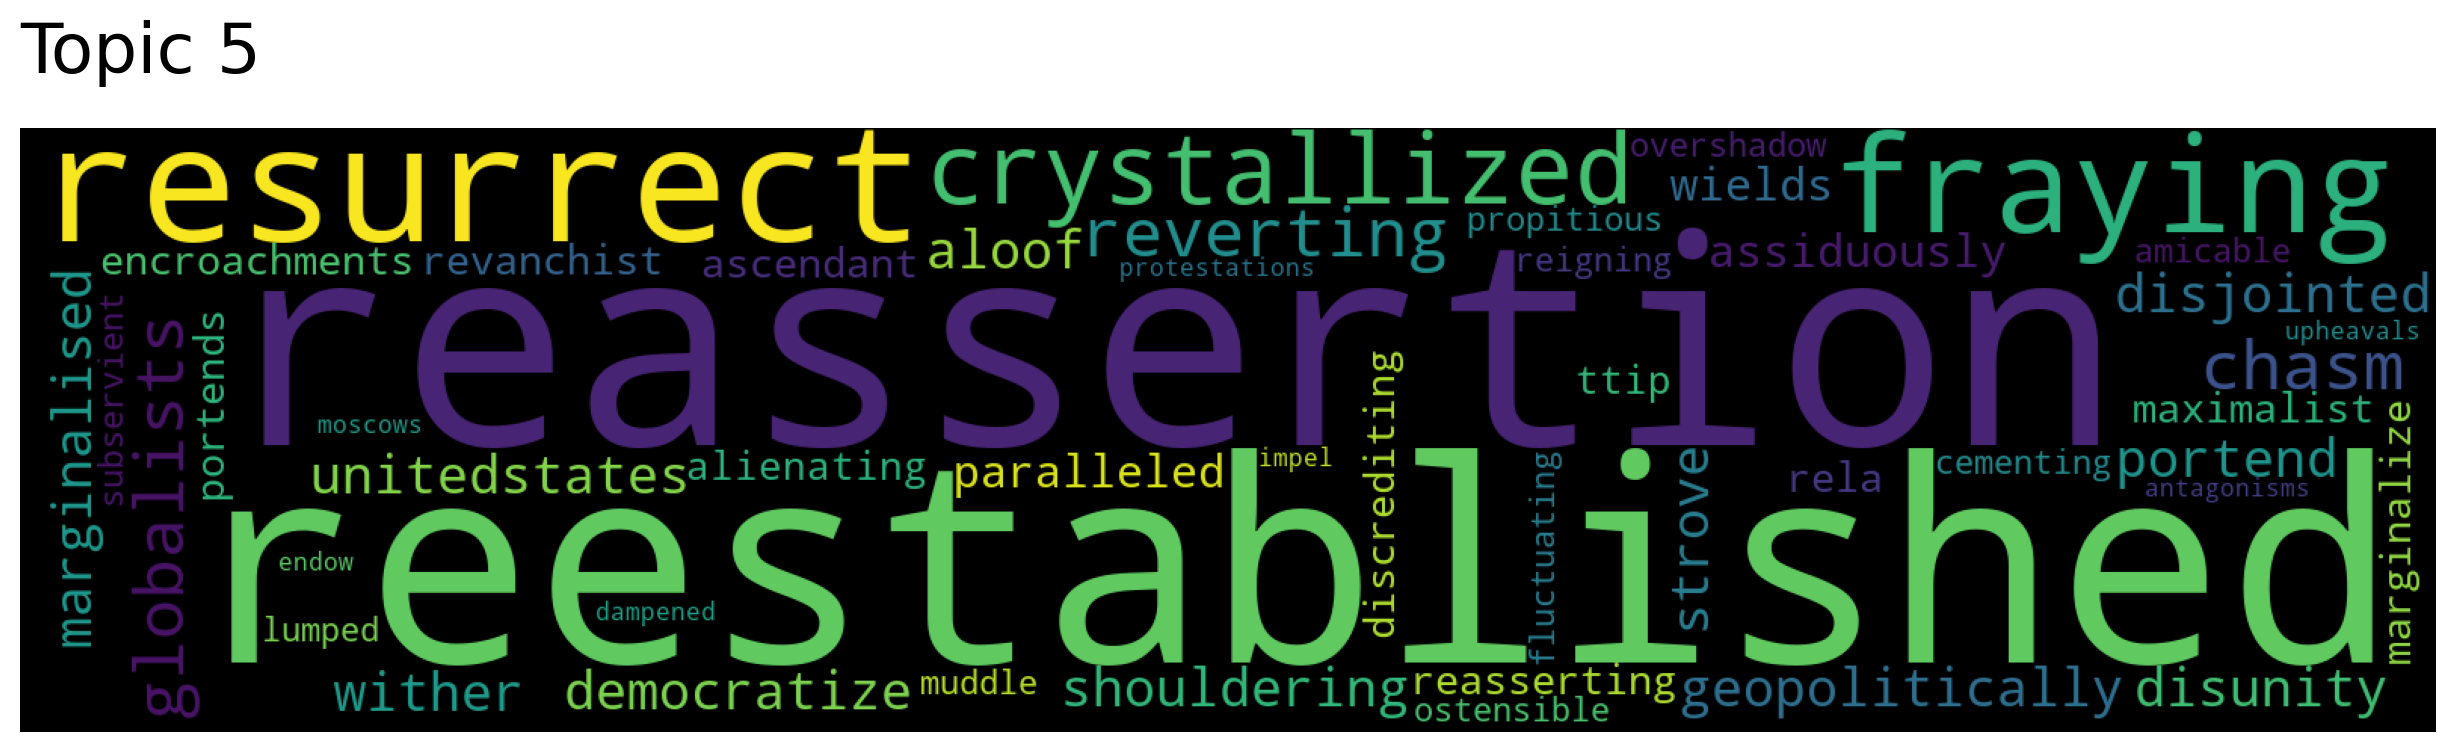

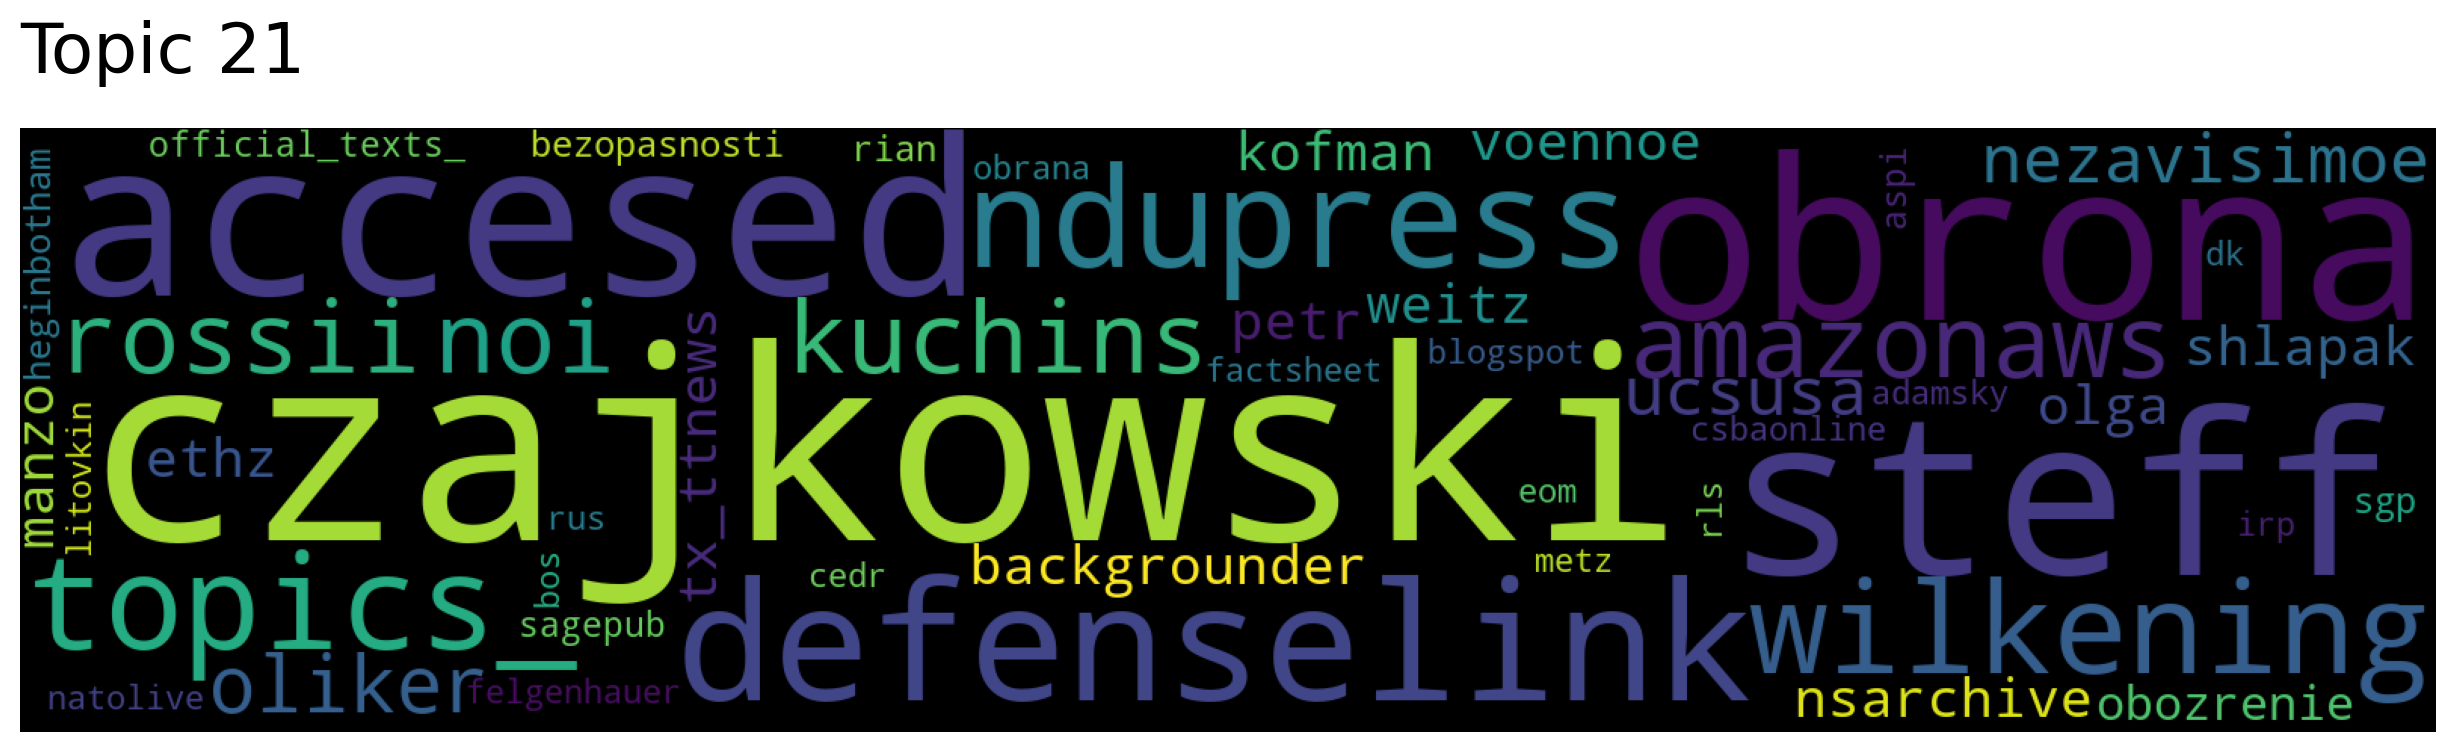

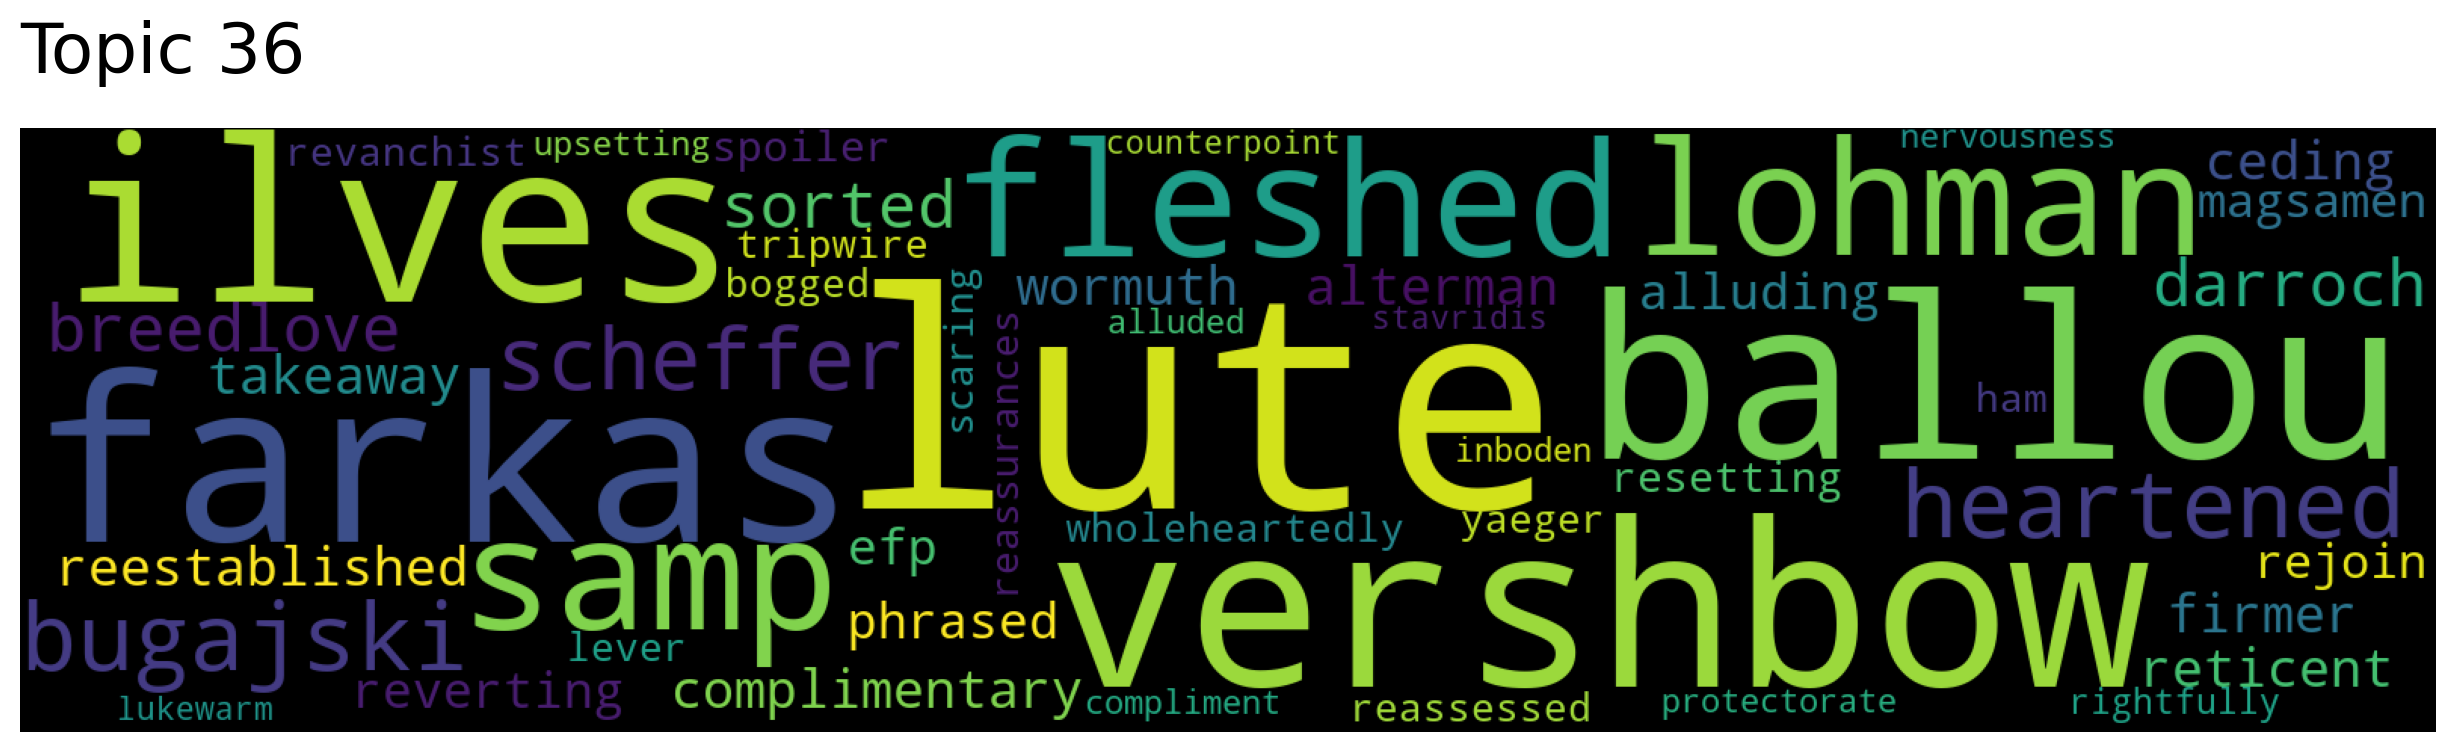

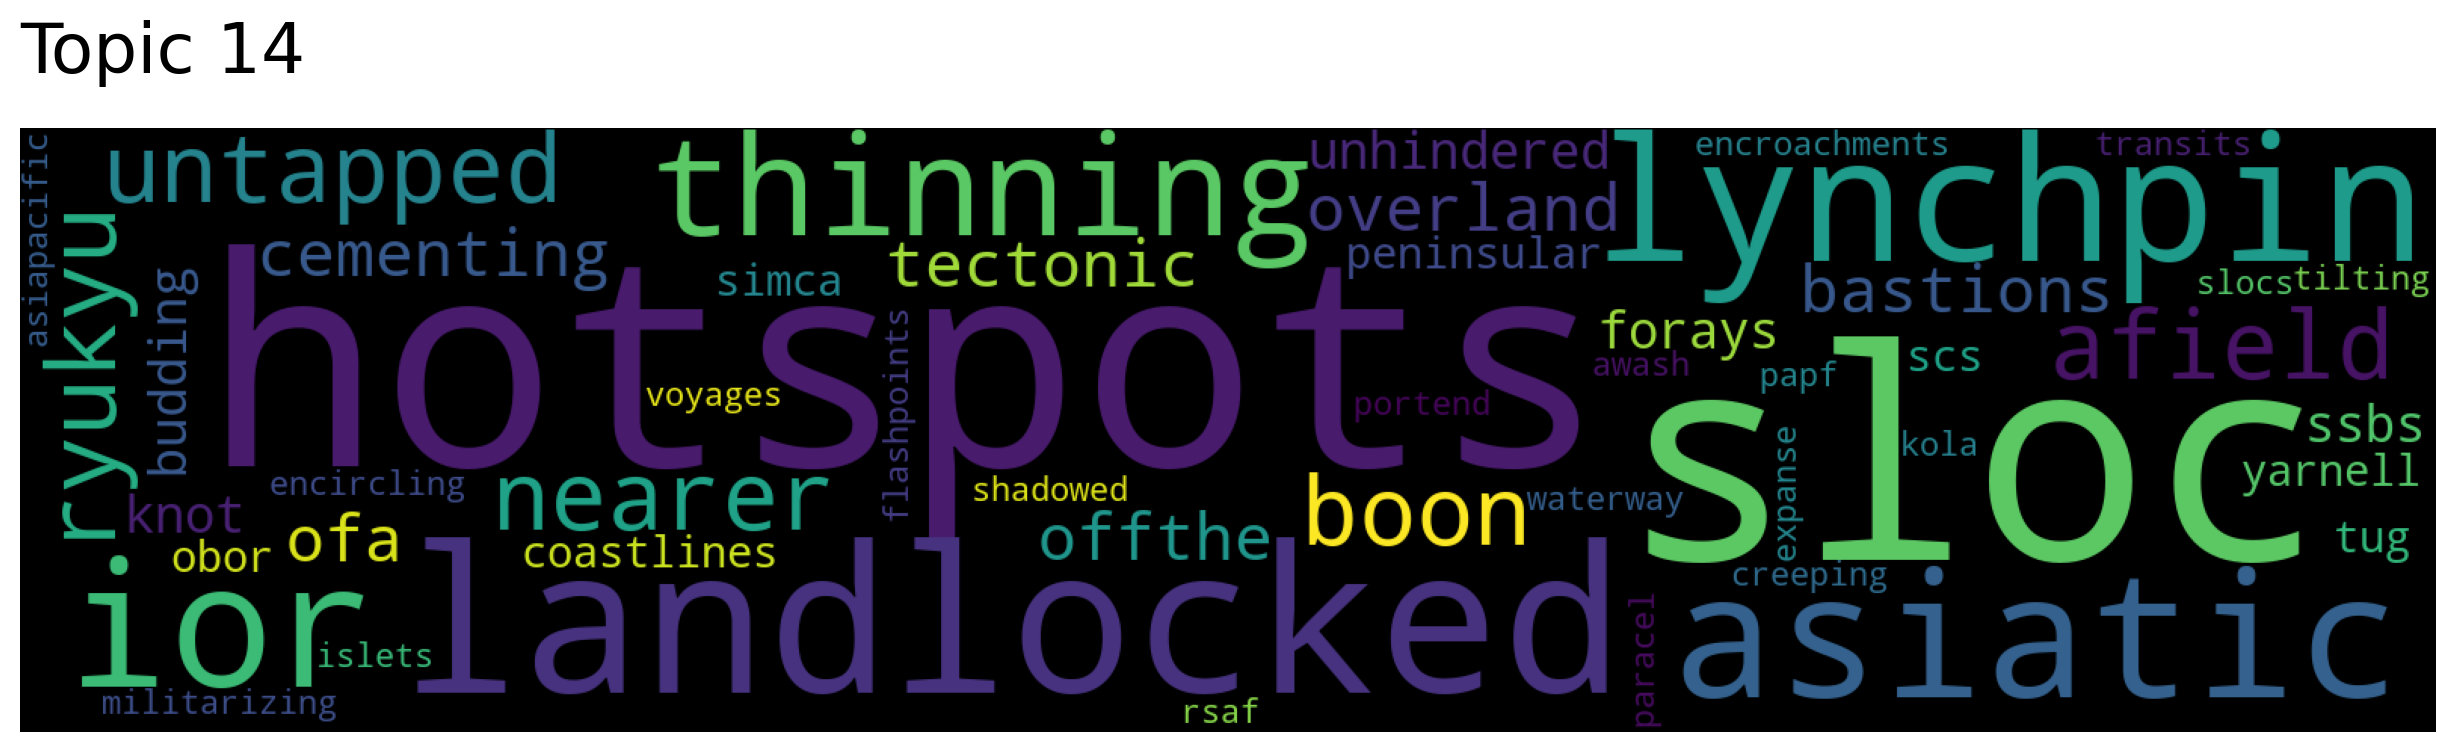

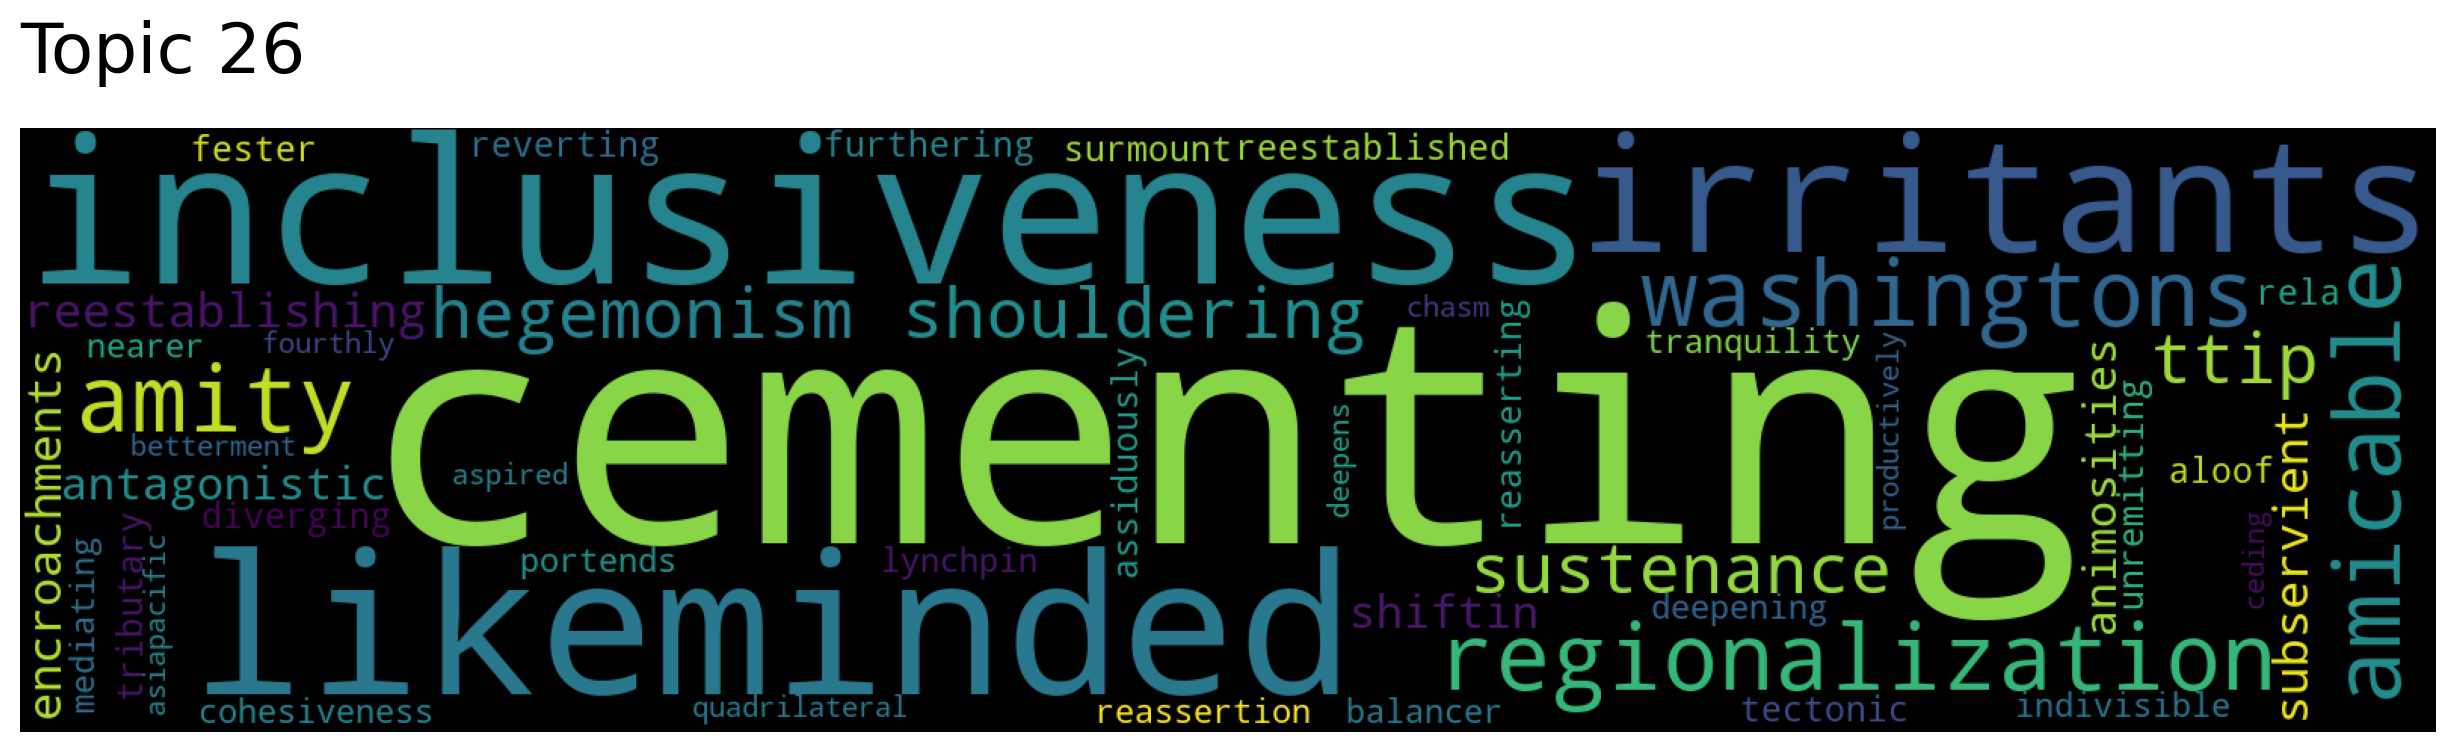

In [76]:
for topic in topic_nums:
    top2vec.generate_topic_wordcloud(topic)

## Search Papers by Topic

In [42]:
documents, document_scores, document_nums = top2vec.search_documents_by_topic(
    topic_num=20, 
    num_docs=5
)

## Search Papers by Keywords

In [51]:
documents, document_scores, document_nums = top2vec.search_documents_by_keywords(
    keywords=["russia"], 
#     keywords_neg=[],
    num_docs=20
)

## Find Similar Words

In [56]:
words, word_scores = top2vec.similar_words(
    keywords=["russia"], 
    keywords_neg=[], 
    num_words=20
)

In [57]:
words

array(['russian', 'moscow', 'russias', 'ukraine', 'kremlin', 'putin',
       'dmitry', 'vladimir', 'kommersant', 'dmitri', 'crimea',
       'kaliningrad', 'eastward', 'golts', 'kiev', 'lavrov', 'izvestia',
       'putins', 'medvedev', 'cis'], dtype='<U11')